Flores Lara Alberto 6BV1

Clasificación para CIFAR usando CNN con Transfer Learning

Librerias necesarias:

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG16
from sklearn.metrics import classification_report
import time

Definir las funciones para crear la CNN con transfer learning y para el entrenamiento y validación del modelo

In [10]:
# Función para construir CNN con Transfer Learning
def build_cnn_transfer_learning(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output_layer)
    return model

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [11]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [13]:
model_cnn_tl = build_cnn_transfer_learning((32, 32, 3))
history_cnn_tl, time_cnn_tl = train_and_evaluate(model_cnn_tl, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 226s 287ms/step - accuracy: 0.4586 - loss: 1.5478 - val_accuracy: 0.5603 - val_loss: 1.2563
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 290ms/step - accuracy: 0.5849 - loss: 1.1863 - val_accuracy: 0.5814 - val_loss: 1.1962
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 223s 285ms/step - accuracy: 0.6073 - loss: 1.1241 - val_accuracy: 0.5872 - val_loss: 1.1663
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 286ms/step - accuracy: 0.6292 - loss: 1.0707 - val_accuracy: 0.6046 - val_loss: 1.1292
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 284ms/step - accuracy: 0.6433 - loss: 1.0295 - val_accuracy: 0.6046 - val_loss: 1.1251
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 284ms/step - accuracy: 0.6538 - loss: 0.9947 - val_accuracy: 0.6104 - val_loss: 1.1162
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 287ms/step - accuracy: 0.6628 - loss: 0.9638 - val_accuracy: 0.6125 - val_loss: 1.1105
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 225s 287ms/step - accuracy: 0.6717 -

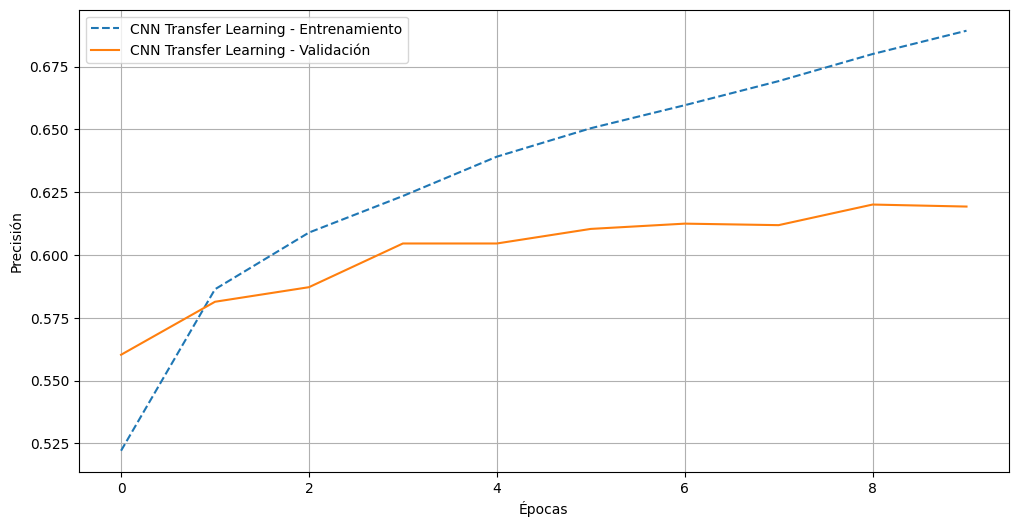

In [14]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_tl], ['CNN Transfer Learning'])
